## Contour Detection

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
im = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_innovative_skills/images/pillow-1.jpg')
assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# contours_none, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours_simple, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Create a blank image to draw contours
# Create a black image with the same shape as the original
contour_image_simple = np.zeros_like(im)

# Draw contours on the blank image
cv2.drawContours(contour_image_simple, contours_simple, -1, (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

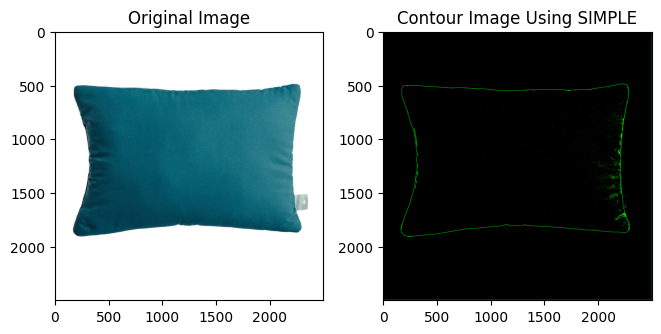

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(contour_image_simple, cv2.COLOR_BGR2RGB))
plt.title('Contour Image Using SIMPLE')

plt.tight_layout()
plt.show()

In [ ]:
# calculating moments

cnt = contours_simple[0]
M = cv2.moments(cnt)
print( M )

{'m00': 6245001.0, 'm10': 7803128749.5, 'm01': 7803128749.5, 'm20': 13000012496667.0, 'm11': 9750009372500.25, 'm02': 13000012496667.0, 'm30': 2.436527342187813e+16, 'm21': 1.6243515614585416e+16, 'm12': 1.6243515614585416e+16, 'm03': 2.436527342187813e+16, 'mu20': 3250003124166.75, 'mu11': 0.0, 'mu02': 3250003124166.75, 'mu30': 4.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 4.0, 'nu20': 0.08333333333333334, 'nu11': 0.0, 'nu02': 0.08333333333333334, 'nu30': 4.104201839582386e-17, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 4.104201839582386e-17}


In [ ]:
print(M['m00'])

6245001.0


In [ ]:
area = cv2.contourArea(cnt)
print(area)

6245001.0


In [ ]:
rows,cols = im.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

normal_image = contour_image_simple.copy()
cv2.line(normal_image,(cols-1,righty),(0,lefty),(0,255,0),2)

<ipython-input-33-61b48981c06c>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
<ipython-input-33-61b48981c06c>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

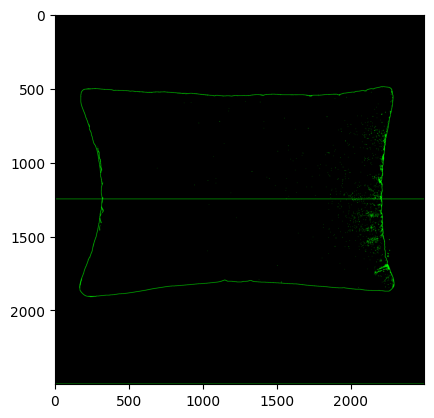

In [ ]:
plt.imshow(normal_image)